In [2]:
#import
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#feature selection
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [3]:
#models
modelsvr = SVR()
modelrf = RandomForestRegressor()
modellr = LinearRegression()

In [4]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [7]:
#dependent variable
depVar = rawData['PAY_AMT6']
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [8]:
#training set (featuer space: x training)
x_train = (features[: 1000])
x_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [9]:
#dependent variable training set (y training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:', str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [10]:
#testing set (x testing)
x_test = features[-100:]
x_test_count = len(x_test.index)
print('The number of observations in the feature testing set is:', str(x_test_count))
print(x_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [11]:
#ground truth (y_test)
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:', str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [12]:
modelrf.fit(x_train, y_train)
print(cross_val_score(modelrf, x_train, y_train))
modelrf.score(x_train, y_train)

[ 0.04178385 -0.00170195  0.02408981 -1.48670821  0.23583609]


0.9046368819455302

In [13]:
modelsvr.fit(x_train, y_train)
print(cross_val_score(modelsvr, x_train, y_train))
modelsvr.score(x_train, y_train)

[-0.06693321 -0.03222669 -0.02653109 -0.07413355 -0.05043631]


-0.025163129881629054

In [14]:
modellr.fit(x_train, y_train)
print(cross_val_score(modellr, x_train, y_train))
modellr.score(x_train, y_train)

[-2.43618053  0.43773401  0.24072215 -6.43322273 -0.14642896]


0.4973481512545356

In [15]:
predictions = modelrf.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
predrsquared = r2_score(y_test, predictions)
print('R Squared: %.3f' % predrsquared)
print('RMSE: %.3f' % rmse)

R Squared: -2.835
RMSE: 45292.993


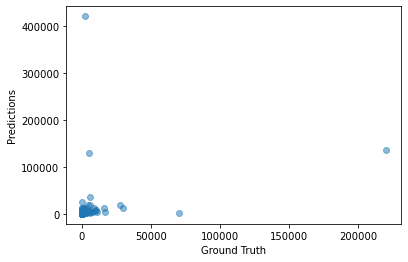

In [16]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

Optimal number of features : 3


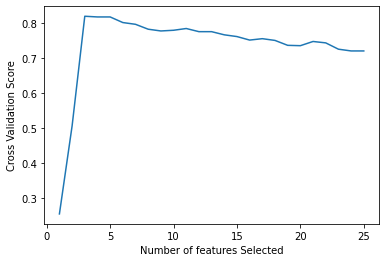

In [19]:
x, y = make_classification(n_samples = 1000, n_features = 25, n_informative = 3, n_redundant = 2, n_repeated = 0, n_classes = 8, n_clusters_per_class = 1, random_state = 0)
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x, y)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features Selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()